In [1]:
import os
import glob
import pandas as pd
import numpy as np
from gensim.models import TfidfModel

df = pd.read_csv('../cleaning/5.removed_newline.csv')
# columns = df.columns.tolist()
df.head()

,Unnamed: 0,text
0,0,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...
1,1,विचारको हिसाबले म नेपाली काङ्ग्रेस हुनुपर्ने ह...
2,2,म पवित्र छू भोट हालेको छैन घामे हरुले नै हाले...
3,3,वडासदस्यका उम्मेदवारको मृत्युपछि श्रीमतीले दिइ...
4,4,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध..."


In [2]:
def remove_punctuation(text):
    punc = '''!()-[]{};:'"\,।<>./|?@#$%^&*_~'''
    for str in text:
        if str in punc:
            text = text.replace(str, "")

    return text

# Apply the function to remove punctuations from the 'Sentences' column
df['text'] = df['text'].apply(remove_punctuation)

print(df['text'][0])

नेकपा एमाले निकै शक्तिशाली देखियो तराजुमा उ एक्लै एकातिर पाँच दल अर्को तिर एक्लै हुँदा पनि झन् झन् लोकपृय झन् झन् भारी हुदैछ एमाले


In [3]:
def remove_stopwords(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in nepali_stopwords]
    return ' '.join(filtered_sentence)

def remove_numbers(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in numbers]
    return ' '.join(filtered_sentence)

with open('../nepali_stopwords.txt','r') as file:
    lines = file.readlines()

with open('../numbers.txt','r') as file:
    lines2 = file.readlines()

nepali_stopwords = [lines.strip() for lines in lines]
numbers = [l.strip() for l in lines2]
# print(nepali_stopwords)
# new_df = df.copy()
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_numbers)
# if not os.path.exists('2.removed_stopwords.csv'):    
#     df['text'].to_csv('2.removed_stopwords.csv', index=False)
df['text']

0        नेकपा एमाले निकै शक्तिशाली तराजुमा उ एक्लै एका...
1        विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतं...
2                  पवित्र भोट हालेको घामे हरुले हालेछन भोट
3        वडासदस्यका उम्मेदवारको मृत्युपछि श्रीमतीले दिइ...
4        एमाले कुहिएको फर्सी छोएपनि रोग लाग्छ माधव नेपा...
                               ...                        
66673    पत्रकार नेताका प्रचण्ड फरमान गठबन्धनका उम्मेदव...
66674    सुशासन समृद्धि समाजवादको आधार रुपन्देहीको सिद्...
66675                                    मेयर भोट कोल्यापस
66676    MCC पक्षधर प्रतिगामी यथास्थिती बादलाई परास्त ग...
66677    स्थानीय तह निर्वाचन नजिकिँदै गर्दा चुनाव आचारस...
Name: text, Length: 66678, dtype: object

In [4]:
# !pip install pystemmer
import Stemmer
stemmer = Stemmer.Stemmer('nepali')
# stemmer.stemWords(nepali_list)
print(df['text'][1])
df['text'] = df['text'].apply(lambda x: stemmer.stemWord(x))
print(df['text'][1])

विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतंककारी मर्या सिनो माओवादीलाई काॅध थाप्ने काङ्ग्रेसलाई कदापि भोट हाल्न सकिन्न
विचारको हिसाबले नेपाली काङ्ग्रेस हुनुपर्ने आतंककारी मर्या सिनो माओवादीलाई काॅध थाप्ने काङ्ग्रेसलाई कदापि भोट हाल्न सकिन्न


In [5]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

words_sent = [x.split() for x in df['text']]
bigram = Phrases(words_sent, min_count=5, threshold=100)
bigram_phraser = Phraser(bigram)
trigram = Phrases(bigram[words_sent], threshold=100)
trigram_phraser = Phraser(trigram)
trigram_bow = [trigram_phraser[bigram_phraser[word]] for word in words_sent] # c

In [6]:
words_sent[4]

['एमाले',
 'कुहिएको',
 'फर्सी',
 'छोएपनि',
 'रोग',
 'लाग्छ',
 'माधव',
 'नेपाल',
 'NepalPress']

In [7]:
trigram_bow[4]

['एमाले',
 'कुहिएको_फर्सी',
 'छोएपनि',
 'रोग',
 'लाग्छ',
 'माधव',
 'नेपाल',
 'NepalPress']

In [8]:
from gensim import corpora
id2word_tri = corpora.Dictionary(trigram_bow)
id2word_tri

In [9]:
corpus_matrix_tri = [id2word_tri.doc2bow(sent) for sent in trigram_bow]
corpus_matrix_tri[0]

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 4),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1)]

In [10]:
import gensim
from gensim.models import CoherenceModel
from tqdm import tqdm
LDA = gensim.models.ldamulticore.LdaMulticore

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step), desc="LDA Training Progress"):
        model = LDA(corpus=corpus,id2word=dictionary,
                    num_topics=num_topics,
                    random_state=256,
                    chunksize=100,
                    passes=14,
                    per_word_topics=True)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word_tri, corpus=corpus_matrix_tri, texts=trigram_bow, start=1, limit=25, step=3)

LDA Training Progress: 100%|██████████| 8/8 [29:34<00:00, 221.80s/it]


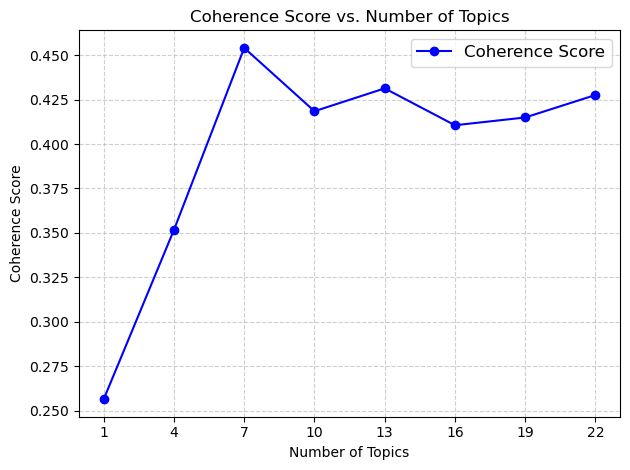

In [11]:
import matplotlib.pyplot as plt
limit = 25
start = 1
step = 3
x = range(start, limit, step)

plt.plot(x, coherence_values, marker='o', color='b', label='Coherence Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.legend(fontsize=12)
plt.xticks(np.arange(1,25,3))
plt.tight_layout()
plt.show()

In [12]:
LDA = gensim.models.ldamulticore.LdaMulticore
lda_model_tri = LDA(corpus=corpus_matrix_tri,id2word=id2word_tri,
                   num_topics=7,
                   random_state=256,
                   chunksize=100,
                   passes=14,
                   per_word_topics=True)

In [13]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tri, corpus = corpus_matrix_tri, dictionary = id2word_tri)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.256718 -0.008839       1        1  26.264631
3      0.210040 -0.063102       2        1  17.731897
6     -0.135285 -0.199105       3        1  15.744372
1     -0.164228  0.082052       4        1  12.700476
0     -0.061872  0.255619       5        1   9.801730
4     -0.155813 -0.102974       6        1   9.154225
5      0.050441  0.036349       7        1   8.602670, topic_info=            Term          Freq         Total Category  logprob  loglift
115     निर्वाचन   9624.000000   9624.000000  Default  30.0000  30.0000
4          एमाले  11627.000000  11627.000000  Default  29.0000  29.0000
36    उम्मेदवारी   5531.000000   5531.000000  Default  28.0000  28.0000
22           भोट  13313.000000  13313.000000  Default  27.0000  27.0000
54      कांग्रेस   4410.000000   4410.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1070        लागी    113.546888    276.427988   Topic7  -6.4579   1.5634
217         नेता    150.636212   1590.743486   Topic7  -6.1752   0.0960
750          ओली    117.898448    636.327639   Topic7  -6.4203   0.7672
705        बनाउन     99.210988    496.050978   Topic7  -6.5929   0.8437
235         मेयर    101.079002   5932.443107   Topic7  -6.5742  -1.6192

[486 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
4772       3  0.993326                  =
12071      4  0.988440     Kathmandu_Pati
4622       5  0.993908         Mid_Nepal…
4623       5  0.993908  No_news_Portal_of
1472       3  0.994964         Shared_via
...      ...       ...                ...
3453       1  0.996707             होलान्
3248       4  0.801370                  –
3248       6  0.197598                  –
8698       4  0.993911                  ’
19298      4  0.989566                  •

[942 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 7, 2, 1, 5, 6])

In [14]:
print('\nPerplexity: ', lda_model_tri.log_perplexity(corpus_matrix_tri))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model_tri, texts=trigram_bow, dictionary=id2word_tri, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.958877244935628

Coherence Score:  0.44703164217571595


## The topics overlap, trying different number of topics

In [15]:
lda_model_tri2 = LDA(corpus=corpus_matrix_tri,id2word=id2word_tri,
                    num_topics=4,
                    random_state=256,
                    chunksize=100,
                    passes=14,
                    per_word_topics=True)
print('\nPerplexity: ', lda_model_tri2.log_perplexity(corpus_matrix_tri))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda2 = CoherenceModel(model=lda_model_tri2, texts=trigram_bow, dictionary=id2word_tri, coherence='c_v')

coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)
vis2 = pyLDAvis.gensim.prepare(lda_model_tri2, corpus = corpus_matrix_tri, dictionary = id2word_tri)
vis2


Perplexity:  -9.616092431437337

Coherence Score:  0.3338194319810067


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.214849 -0.017032       1        1  40.050506
1     -0.221493 -0.122058       2        1  26.127283
3      0.089680 -0.068472       3        1  19.296401
0     -0.083036  0.207562       4        1  14.525809, topic_info=            Term          Freq         Total Category  logprob  loglift
36    उम्मेदवारी   5428.000000   5428.000000  Default  30.0000  30.0000
22           भोट  12664.000000  12664.000000  Default  29.0000  29.0000
4          एमाले  11001.000000  11001.000000  Default  28.0000  28.0000
115     निर्वाचन   9474.000000   9474.000000  Default  27.0000  27.0000
50         देउवा   3725.000000   3725.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
121      गठबन्धन    256.670367   2248.872481   Topic4  -6.1662  -0.2411
366       प्रमुख    192.058928   1175.015479   Topic4  -6.4562   0.1180
1348          जय    177.286374    948.253055   Topic4  -6.5362   0.2524
1123      चुनावी    155.870731    541.681722   Topic4  -6.6649   0.6836
1873  निर्वाचनमा    154.876071    744.718689   Topic4  -6.6713   0.3589

[295 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
524        2  0.997919  MakaluKhabar
1472       4  0.989682    Shared_via
12287      2  0.009415   Tesro_Ankha
12287      4  0.988615   Tesro_Ankha
696        2  0.996159        अग्रता
...      ...       ...           ...
237        1  0.852375          होला
237        3  0.147356          होला
950        1  0.990088          होस्
950        3  0.005929          होस्
3248       2  0.999082             –

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [18]:
import csv
import pandas as pd
from collections import Counter

def generate_word_csv(lda_model, dictionary, num_words=50):
    # Combine all tokens from the dataset into a single list
    all_tokens = [token for tokens in trigram_bow for token in tokens]

    # Count the occurrences of each word in the full dataset
    word_counts = Counter(all_tokens)

    # Save the word counts to a CSV file
    with open("trigram_word_counts_full_dataset.csv", mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Word', 'Count'])
        writer.writerows(word_counts.items())

    # Generate CSV files for each topic containing word counts
    topics = lda_model.show_topics(num_topics=4, num_words=num_words, formatted=False)

    for topic_id, topic_words in topics:
        topic_words_dict = dict(topic_words)
        topic_words_list = [(word_counts[word],word) for word in topic_words_dict]

        df = pd.DataFrame(topic_words_list,columns=['Word', 'Count'])
        df.sort_values(["Word"], axis=0, ascending=[False],inplace=True)
        df.to_csv(f"trigram_topic_{topic_id+1}.csv",header=False, index=False)

generate_word_csv(lda_model_tri2,id2word_tri, num_words=50)